In [1]:
pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.0.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs     

importing libraries

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow import keras

Importing dataset 

In [84]:
data=pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [86]:
data["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [90]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [91]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [92]:
species_name = le.classes_
print(species_name)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [94]:
X = data.drop(columns=['Id', 'Species'])
y = data['Species']
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [95]:
print(y[:5])

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32


In [98]:
#splitting into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=69)#we use random seed for reproducing the same random sequence

In [99]:

x_train.shape


(105, 4)

In [100]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
print(x_train[:1])
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train[:1])

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
57            4.9           2.4            3.3           1.0
[[-1.14630942 -1.44374444 -0.25650655 -0.258263  ]]


In [101]:
y_train = keras.utils.to_categorical(y_train, num_classes=3)
print(y_train[:5])

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [104]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, module="tensorflow")
#building the model
from keras.models import Sequential
from keras.layers import Dense, Dropout
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(x_train.shape[-1], )))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=3, activation='softmax'))

In [106]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                160       
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1315 (5.14 KB)
Trainable params: 1315 (5.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [108]:
model.fit(x_train, y_train, epochs=100, verbose=2)

Train on 105 samples
Epoch 1/100
105/105 - 0s - loss: 0.1175 - accuracy: 0.9810 - 13ms/epoch - 125us/sample
Epoch 2/100
105/105 - 0s - loss: 0.1708 - accuracy: 0.9524 - 13ms/epoch - 125us/sample
Epoch 3/100
105/105 - 0s - loss: 0.1422 - accuracy: 0.9524 - 12ms/epoch - 118us/sample
Epoch 4/100
105/105 - 0s - loss: 0.1073 - accuracy: 0.9619 - 12ms/epoch - 111us/sample
Epoch 5/100
105/105 - 0s - loss: 0.1279 - accuracy: 0.9524 - 13ms/epoch - 124us/sample
Epoch 6/100
105/105 - 0s - loss: 0.1405 - accuracy: 0.9429 - 11ms/epoch - 104us/sample
Epoch 7/100
105/105 - 0s - loss: 0.1369 - accuracy: 0.9524 - 11ms/epoch - 105us/sample
Epoch 8/100
105/105 - 0s - loss: 0.1145 - accuracy: 0.9619 - 10ms/epoch - 96us/sample
Epoch 9/100
105/105 - 0s - loss: 0.1255 - accuracy: 0.9619 - 11ms/epoch - 104us/sample
Epoch 10/100
105/105 - 0s - loss: 0.1328 - accuracy: 0.9619 - 11ms/epoch - 103us/sample
Epoch 11/100
105/105 - 0s - loss: 0.1111 - accuracy: 0.9810 - 13ms/epoch - 119us/sample
Epoch 12/100
105/105 

Epoch 95/100
105/105 - 0s - loss: 0.0885 - accuracy: 0.9714 - 11ms/epoch - 103us/sample
Epoch 96/100
105/105 - 0s - loss: 0.0871 - accuracy: 0.9714 - 11ms/epoch - 104us/sample
Epoch 97/100
105/105 - 0s - loss: 0.0984 - accuracy: 0.9714 - 9ms/epoch - 90us/sample
Epoch 98/100
105/105 - 0s - loss: 0.0786 - accuracy: 0.9714 - 10ms/epoch - 99us/sample
Epoch 99/100
105/105 - 0s - loss: 0.1065 - accuracy: 0.9619 - 10ms/epoch - 97us/sample
Epoch 100/100
105/105 - 0s - loss: 0.0836 - accuracy: 0.9619 - 12ms/epoch - 116us/sample


In [109]:
#making predictions
prediction = model.predict(x_test)
print(prediction[:5])

[[9.9999845e-01 1.5298740e-06 1.0108498e-09]
 [2.6436517e-04 9.9632084e-01 3.4148402e-03]
 [9.9997640e-01 2.3554190e-05 1.4212934e-08]
 [3.4576420e-05 6.0196607e-03 9.9394578e-01]
 [9.9995089e-01 4.9057322e-05 3.4023312e-08]]


C:\Users\lotli\anaconda3\Lib\site-packages\keras\src\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [110]:
prediction = np.argmax(prediction, axis=-1)
print(prediction[:5])

[0 1 0 2 0]


In [111]:
print(y_test[:5])

4      0
58     1
20     0
114    2
31     0
Name: Species, dtype: int32


In [112]:
#printing the accuracy of our model
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, prediction))

0.9777777777777777


Text(50.72222222222221, 0.5, 'actual')

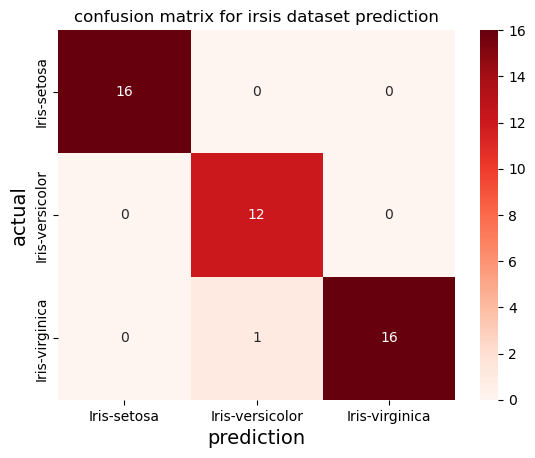

In [113]:
#printing a heatmap of our confusion matrix
cm = confusion_matrix(y_test, prediction)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=species_name, yticklabels=species_name)
ax.set_title('confusion matrix for irsis dataset prediction')
ax.set_xlabel('prediction', fontsize=14)
ax.set_ylabel('actual', fontsize=14)